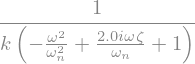

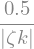

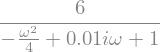

In [1]:
#%matplotlib notebook
import numpy as np
import scipy.signal

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
print_context_dict ={'text.usetex':True,
                     'text.latex.preamble':"\\usepackage{siunitx}\n \\usepackage{xfrac}",
                     'font.size':10,
                     'legend.fontsize':10,
                     'xtick.labelsize':10,
                     'ytick.labelsize':10,
                     'axes.labelsize':10,
                     'font.family':'serif',
                     'legend.labelspacing':0.1,
                     'axes.linewidth':0.5,
                     'xtick.major.width':0.2,
                     'ytick.major.width':0.2,
                     'xtick.major.width':0.5,
                     'ytick.major.width':0.5,
                     'figure.figsize':(5.906,5.906/1.618),#print #150 mm \columnwidth
                     #'figure.figsize':(5.906/2,5.906/2/1.618),#print #150 mm \columnwidth
                     #'figure.figsize':(5.53/2,2.96),#beamer
                     #'figure.figsize':(5.53/2*2,2.96*2),#beamer
                     'figure.dpi':100}
    #figsize=(5.53,2.96)#beamer 16:9
    #figsize=(3.69,2.96)#beamer 16:9
    #plot.rc('axes.formatter',use_locale=True) #german months
# must be manually set due to some matplotlib bugs
if print_context_dict['text.usetex']:
    #plt.rc('text.latex',unicode=True)
    plt.rc('text',usetex=True)
    plt.rc('text.latex',preamble="\\usepackage{siunitx}\n \\usepackage{xfrac}")


from sympy import *
import sympy.plotting.experimental_lambdify
init_printing()

f,k,d,m,zeta,fn,sigma = symbols('\omega k d m \zeta \omega_n \sigma')
H = (1/k)/(1-(f/fn)**2+1j*2*zeta*(f/fn))
display(H)
display(abs(H.subs(f,fn)))
p =3*sigma
this_frfsigma = (H*p).subs(zeta,0.01).subs(k,1).subs(fn,2).subs(sigma,2)
display(this_frfsigma)
display(Integral(this_frfsigma,(f,0,2.5*2)).evalf())

In [2]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\sfrac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\sfrac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\sfrac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

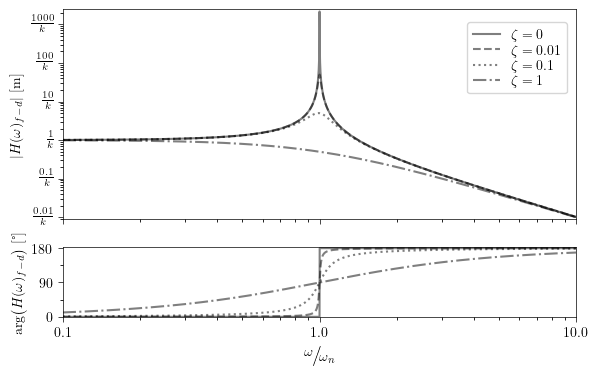

In [3]:
@ticker.FuncFormatter
def major_formatter(x, pos):
    x=('%.15f' % x).rstrip('0').rstrip('.')
    return f'$\\frac{{{x}}}{{k}}$'

with matplotlib.rc_context(rc=print_context_dict):
    fig,[ax1,ax2]=plt.subplots(2,1,gridspec_kw={'height_ratios':[3,1]}, sharex=True)
    for linestyle, zeta_ in [('solid',0), ('dashed',0.01), ('dotted',0.1), ('dashdot',1)]:#, ((0, (3, 1, 1, 1, 1, 1)),1)]:
        x = np.logspace(-1,1,10000)
       
        #exp= sympy.plotting.experimental_lambdify.vectorized_lambdify([f],(abs(H.subs(fn,1).subs(k,1).subs(zeta,zeta_))))
        label=f'$\\zeta = {zeta_}$'
        y = abs(1/(1*(-(x**2/1**2)+2*1j/1*x*zeta_+1)))
        ax1.loglog(x,y,
            label=label,
            linestyle = linestyle, color='black', alpha=0.5)
        #exp = sympy.plotting.experimental_lambdify.vectorized_lambdify([f],(arg(H.subs(fn,10).subs(k,1).subs(zeta,zeta_))))
        
        y = -np.angle(1/(1*(-(x**2/1**2)+2*1j/1*x*zeta_+1)))/np.pi*180
        ax2.plot(x,y,linestyle=linestyle, color='black', alpha=0.5)
    # for zeta_ in [0.001,0.1,0.5,1]:
    #     p=plot(abs(H.subs(fn,10).subs(k,1).subs(zeta,zeta_)), (f,0.1,100),xscale='log',yscale='log', show=false)
    #     ps.append(p)
    # for p in ps[1:]:
    #     ps[0].append(p[0])
    # ps[0].show()
    ax2.set_xlabel('\Large $\\sfrac{\omega}{\omega_n}$')
    ax1.set_ylabel('$|H(\omega)_{f-d}|$  [\si{\metre}]')
    ax2.set_ylabel('$\\arg\\bigl(H(\omega)_{f-d}\\bigr)$ [\si{\degree}]')
    ax1.yaxis.set_major_formatter(major_formatter)
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(90))
    ax2.yaxis.set_minor_locator(ticker.MultipleLocator(45))
    
    ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}'))
    ax2.set_xlim((0.1,10))
    #axes[1].legend()
    plt.figlegend(loc=(0.78,0.75))#.draggable()
    plt.subplots_adjust(left=0.109, bottom=0.131, right=0.979, top=0.975, wspace=0.044)
    #ax1.set_ylim((0,))

    #plt.tight_layout(pad=0, w_pad=0, h_pad=0)
    plt.show()
    

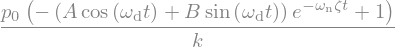

In [4]:
k, d, m, t,td = symbols('k d m t t_d', positive=True, real=True)
omegad, zeta, omega, omegaf =  symbols('\omega_\mathrm{d} \zeta \omega_\mathrm{n} \\omega_\mathrm{f}', real=True, positive=True)
A,B,C,D,ydyn,u,p0,  =  symbols('A B C D y_\mathrm{dyn} y p0', real=True)
u_=p0/k*(1-exp(-zeta*omega*t)*(cos(omegad*t)*A+B*sin(omegad*t)))
display(u_)

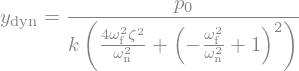

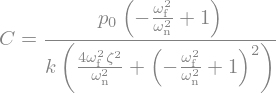

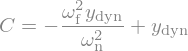

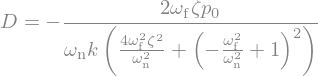

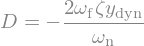

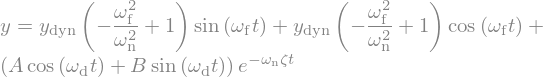

In [5]:
ydyn_=p0/(k)*1/((1-(omegaf/omega)**2)**2+(2*zeta*omegaf/omega)**2)
display(Eq(ydyn,ydyn_))
C_=p0/k*(1-(omegaf/omega)**2)/((1-(omegaf/omega)**2)**2+(2*zeta*omegaf/omega)**2)
display(Eq(C,C_))
C_/=ydyn_/ydyn
display(Eq(C,simplify(C_)))
D_=p0/k*(-2*zeta*omegaf/omega)/((1-(omegaf/omega)**2)**2+(2*zeta*omegaf/omega)**2)
display(Eq(D,D_))
D_/=ydyn_/ydyn
display(Eq(D,simplify(D_)))
u_=exp(-zeta*omega*t)*(A*cos(omegad*t)+B*sin(omegad*t))+C*sin(omegaf*t)+D*cos(omegaf*t)
display(Eq(u,u_))
u__=u_.subs(C,C_).subs(D,C_)
display(Eq(u,u__))

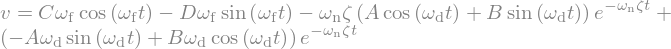

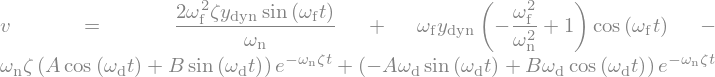

In [6]:
v=symbols('v')
v_=diff(u_,t)
display(Eq(v,v_))
v__=v_.subs(C,C_).subs(D,D_)
display(Eq(v,v__))

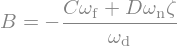

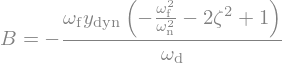

In [7]:
A_,B_ = linsolve((u_.subs(t,0),v_.subs(t,0)),(A,B)).args[0].args
display((Eq(A,simplify(A_))))
display(Eq(B,B_))
A__ = -D_
display(Eq(A+D,simplify(A_-A__).subs(D,D_)))
B__=-ydyn*omegaf/omegad*(1-omegaf**2/omega**2-2*zeta**2)
display(Eq(B,B__))
simplify((B_.subs(C,C_).subs(D,D_)-B__))

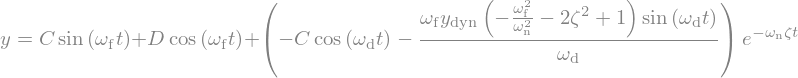

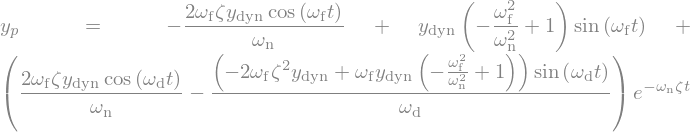

In [8]:
display(Eq(u,u_.subs(A,-C).subs(B,B__)))
up_=u_.subs(A,A_).subs(B,B_).subs(C,C_).subs(D,D_)
display(Eq(symbols("y_p"),up_))

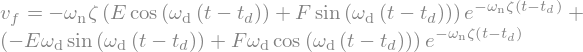

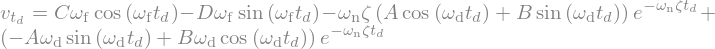

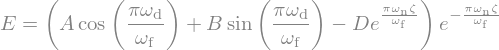

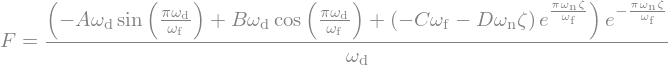

In [9]:
E, F = symbols('E F')
uf_=exp(-zeta*omega*t)*(E*cos(omegad*t)+F*sin(omegad*t))
vf_=diff(uf_,t)
display((Eq(symbols('y_f'),uf_)))
display((Eq(symbols('v_f'),vf_.subs(t,t-td))))
u0f = u_.subs(t,td)
v0f = v_.subs(t,td)
display(Eq(symbols('y_{t_d}'),u0f))
display(Eq(symbols('v_{t_d}'),v0f))
E_,F_ = linsolve((uf_.subs(t,0)-u0f,vf_.subs(t,0)-v0f),(E,F)).args[0].args
E_=trigsimp(E_.subs(td,pi/omegaf))
F_=trigsimp(F_.subs(td,pi/omegaf))
display(Eq(E,E_))
display(Eq(F,F_))

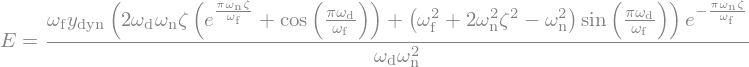

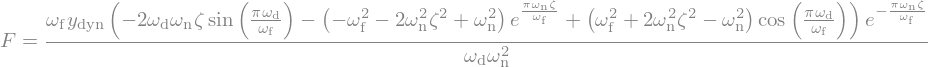

In [10]:
display(Eq(E,simplify(E_.subs(A,A_).subs(B,B_).subs(C,C_).subs(D,D_))))
display(Eq(F,simplify(F_.subs(A,A_).subs(B,B_).subs(C,C_).subs(D,D_))))

In [11]:
uf__ = simplify(uf_.subs(E,E_).subs(F,F_).subs(A,A_).subs(B,B_).subs(C,C_).subs(D,D_).subs(ydyn,ydyn_))

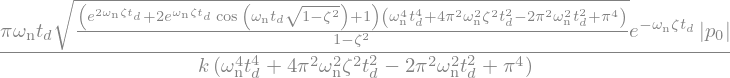

In [12]:
E____= (E_.subs(A,A_).subs(B,B_).subs(C,C_).subs(D,D_).subs(ydyn,ydyn_)).subs(omegad,omega*sqrt(1-zeta**2)).subs(omegaf,pi/td)
F____= (F_.subs(A,A_).subs(B,B_).subs(C,C_).subs(D,D_).subs(ydyn,ydyn_).subs(omegad,omega*sqrt(1-zeta**2))).subs(omegaf,pi/td)
Rd=factor(sqrt(E____**2+F____**2))
trigsimp(Rd)

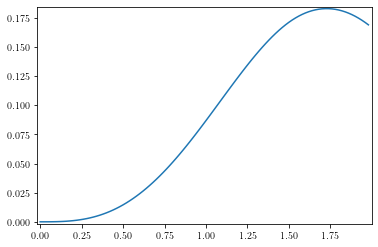

In [13]:
import scipy.integrate
u__=Piecewise((up_,t<td),(uf__.subs(t,t-td),t>=td))
#upundamped_ = 1/2*p0/k*(sin(2*pi*t/T)-2*pi*t/T*cos(2*pi*t/T)).subs(T,2*pi/omega).subs(td,pi/omegaf)
upundamped_ = -1/2*p0/k*(omega*t*cos(omega*t)-sin(omega*t))
#ufundamped_ = pi/2*p0/k*cos(2*pi*(t/T-1/2)).subs(T,2*pi/omega).subs(td,pi/omegaf)
ufundamped_ = -1/2*p0/k*pi*cos(omega*t)
uundamped_=Piecewise((upundamped_,t<td),(ufundamped_,t>=td))
p0_=10000
k_=66436.00832538285
Tn_=4.0010225030343705
fact=0.3749041648384636
td_=fact*Tn_
omegaf_=pi/td_
omegan_=2*pi/Tn_
zeta_=0.04996
display(td_)
display(Tn_)
display(p0_)
display(k_)
display(zeta_)
display(omegaf_.evalf())
display(omegan_.evalf())
display((omegan_*sqrt(1-zeta_**2)).evalf())
display(sqrt(ydyn_.subs(omegad,omega*sqrt(1-zeta**2)).subs(omega, omegan_).subs(omegaf,omegaf_).subs(td,td_).subs(p0,p0_).subs(k,k_).subs(zeta,zeta_)).evalf())
display(A__.subs(ydyn,ydyn_).subs(omegad,omega*sqrt(1-zeta**2)).subs(omega, omegan_).subs(omegaf,omegaf_).subs(td,td_).subs(p0,p0_).subs(k,k_).subs(zeta,zeta_).evalf())
display(B__.subs(ydyn,ydyn_).subs(omegad,omega*sqrt(1-zeta**2)).subs(omega, omegan_).subs(omegaf,omegaf_).subs(td,td_).subs(p0,p0_).subs(k,k_).subs(zeta,zeta_).evalf())
display(C_.subs(ydyn,ydyn_).subs(omegad,omega*sqrt(1-zeta**2)).subs(omega, omegan_).subs(omegaf,omegaf_).subs(td,td_).subs(p0,p0_).subs(k,k_).subs(zeta,zeta_).evalf())
display(D_.subs(ydyn,ydyn_).subs(omegad,omega*sqrt(1-zeta**2)).subs(omega, omegan_).subs(omegaf,omegaf_).subs(td,td_).subs(p0,p0_).subs(k,k_).subs(zeta,zeta_).evalf())
display(E____.subs(ydyn,ydyn_).subs(omegad,omega*sqrt(1-zeta**2)).subs(omega, omegan_).subs(omegaf,omegaf_).subs(td,td_).subs(p0,p0_).subs(k,k_).subs(zeta,zeta_).evalf())
display(F____.subs(ydyn,ydyn_).subs(omegad,omega*sqrt(1-zeta**2)).subs(omega, omegan_).subs(omegaf,omegaf_).subs(td,td_).subs(p0,p0_).subs(k,k_).subs(zeta,zeta_).evalf())
yvals=[]
tvals=[]
pvals=[]
evals=[]
energy=0
for i in range(100):
    t_=i/75*td_
    tvals.append(t_)
    if (omegaf_-omegan_) ==0:
        y__=uundamped_.subs(omega, omegan_).subs(omegaf,omegaf_).subs(td,td_).subs(p0,p0_).subs(k,k_).subs(t,t_).evalf()
    else:
        y__=u__.subs(ydyn,ydyn_).subs(omegad,omega*sqrt(1-zeta**2)).subs(omega, omegan_).subs(omegaf,omegaf_).subs(td,td_).subs(p0,p0_).subs(k,k_).subs(zeta,zeta_).subs(t,t_).evalf()

    yvals.append(y__)
    if t_<=td_:
        p__ = (sin(pi/td_*t_)*p0_).evalf()

    else:
        p__=0
    pvals.append(p__)
    evals.append(p__*y__)
#     if (omegaf_-omegan_) ==0:
#         display(p0_/k_/2*3/4*pi/omegaf_)
#     else:
#         display(worksymb.subs(ydyn,ydyn_).subs(omegad,omega*sqrt(1-zeta**2)).subs(omega, omegan_).subs(omegaf,omegaf_).subs(td,td_).subs(p0,p0_).subs(k,k_).evalf())
display(scipy.integrate.simps(evals,tvals, even='first'))
plt.figure()
# plt.plot(tvals,pvals, ls='dashed')
plt.plot(tvals,yvals)
# plt.plot(tvals, evals)
#plt.ylim(-2,2)
plt.show()

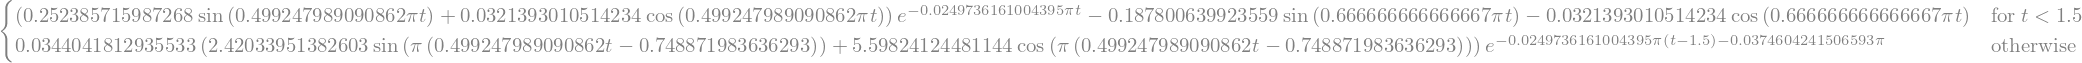

In [14]:
N(u__.subs(ydyn,ydyn_).subs(omegad,omega*sqrt(1-zeta**2)).subs(omega, omegan_).subs(omegaf,omegaf_).subs(td,td_).subs(p0,p0_).subs(k,k_).subs(zeta,zeta_))

In [15]:
u_

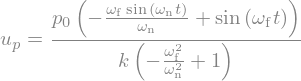

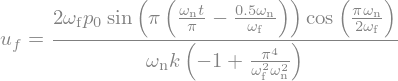

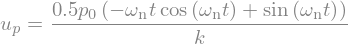

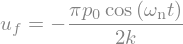

In [16]:
T=symbols('T')
display(Eq(symbols('u_p'),(1/(1-(T/2/td)**2)*(sin(pi*t/td)-T/2/td*sin(2*pi*t/T))*p0/k).subs(T,2*pi/omega).subs(td,pi/omegaf)))
display(Eq(symbols('u_f'),((T/td*cos(pi*td/T))/((T/2*td)**2-1)*sin(2*pi*(t/T-1/2*td/T))*p0/k).subs(T,2*pi/omega).subs(td,pi/omegaf)))
display(Eq(symbols('u_p'),1/2*p0/k*(sin(2*pi*t/T)-2*pi*t/T*cos(2*pi*t/T)).subs(T,2*pi/omega).subs(td,pi/omegaf)))
display(Eq(symbols('u_f'),simplify(pi/2*p0/k*cos(2*pi*(t/T-1/2)).subs(T,2*pi/omega).subs(td,pi/omegaf))))

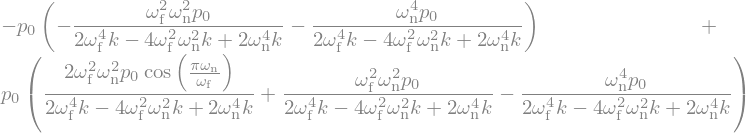

In [17]:
worksymb=Integral((diff(up_,t)*p0*sin(omegaf*t)).subs(ydyn,ydyn_).subs(omegad,omega*sqrt(1-zeta**2)).subs(zeta,0),(t,0,pi/omegaf)).doit()
display(worksymb)


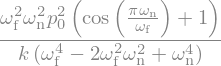

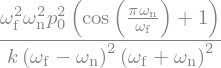

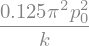

In [18]:
display(simplify(worksymb))
display(factor(simplify(worksymb)))
display(expand((omegaf**2-omega**2)**2))
Integral((diff(upundamped_,t)*p0*sin(omegaf*t)).subs(ydyn,ydyn_).subs(omegad,omega*sqrt(1-zeta**2)).subs(zeta,0).subs(omega,omegaf),(t,0,pi/omegaf)).doit()

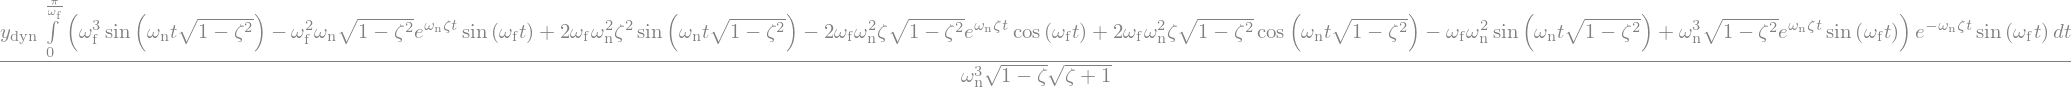

In [19]:
factor(Integral((up_*sin(omegaf*t)).subs(omegad,omega*sqrt(1-zeta**2)),(t,0,pi/omegaf)))

In [20]:
def analytical_constants_half_sine(p0,k,omegan,zeta,tp):
    omegad = omegan*np.sqrt(1-zeta**2)
    omegaf = np.pi/tp

    if np.isclose(zeta,0) and np.isclose(omegaf,omegad):
        raise NotImplementedError('Modal decomposition of impulses at resonance for undamped system is not implemented yet')

    ydyn =np.sqrt(p0/k/((1-(omegaf/omegan)**2)**2+(2*zeta*omegaf/omegan)**2))
    A=ydyn**2*2*zeta*omegaf/omegan
    B=-ydyn**2*omegaf/omegad*(1-(omegaf/omegan)**2-2*zeta**2)
    C=ydyn**2*(1-(omegaf/omegan)**2)
    D=-ydyn**2*2*zeta*omegaf/omegan
    E=np.exp(-omegan*zeta*tp)*(A*np.cos(omegad*tp)+B*np.sin(omegad*tp)-np.exp(omegan*zeta*tp)*D)
    F=np.exp(-omegan*zeta*tp)*(-A*np.sin(omegad*tp)+B*np.cos(omegad*tp))-C*omegaf/omegad-D*zeta*omegan/omegad

    return A,B,C,D,E,F

def analytical_response_half_sine(t_vals,omegan,zeta,A,B,C,D,E,F,tp,ts=0):

    omegad = omegan*np.sqrt(1-zeta**2)
    omegaf = np.pi/tp

    imp_resp_ex = np.zeros_like(t_vals)

    this_inds = np.logical_and(t_vals>ts,t_vals<ts+tp)
    forced_resp=np.exp(-omegan*zeta*(t_vals[this_inds]-ts))\
                 * (  A*np.cos(omegad*(t_vals[this_inds]-ts))
                    + B*np.sin(omegad*(t_vals[this_inds]-ts)))\
                 + C*np.sin(omegaf*(t_vals[this_inds]-ts))\
                 + D*np.cos(omegaf*(t_vals[this_inds]-ts))
    imp_resp_ex[this_inds] = forced_resp

    this_inds = t_vals >= ts+tp
    free_response = np.exp(-omegan*zeta*(t_vals[this_inds]-ts-tp))\
                     * (  E*np.cos(omegad*(t_vals[this_inds]-ts-tp))
                        + F*np.sin(omegad*(t_vals[this_inds]-ts-tp)))

    imp_resp_ex[this_inds] = free_response

    return imp_resp_ex

def work_integrand_half_sine(t,omegan,zeta,A,B,C,D,p_i, tp,ts=0):

    omegad = omegan*np.sqrt(1-zeta**2)
    omegaf = np.pi/tp


    assert t > ts  and t < ts+tp 

    forced_resp=np.exp(-omegan*zeta*(t-ts))\
                 * (  A*np.cos(omegad*(t-ts))
                    + B*np.sin(omegad*(t-ts)))\
                 + C*np.sin(omegaf*(t-ts))\
                 + D*np.cos(omegaf*(t-ts))
    impulse = -np.cos(omegaf*(t-ts))*p_i*omegaf

    return forced_resp*impulse

@ticker.FuncFormatter
def major_formatterpk(x, pos):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    den = 10
    number=1
    num = np.int(np.rint(den*x/number))
    com = gcd(num,den)
    (num,den) = (int(num/com),int(den/com))
    
    x=('%.15f' % x).rstrip('0').rstrip('.')
    if num==0:
        return f'$0$'
    if den==1:
        if num==1:
            return f'$\\frac{{p_0^2}}{{k}}$'
        return f'${num}\\frac{{p_0^2}}{{k}}$'
    if num==1:
        return f'$\\frac{{p_0^2}}{{{den}k}}$'
    return f'$\\frac{{{num}p_0^2}}{{{den}k}}$'

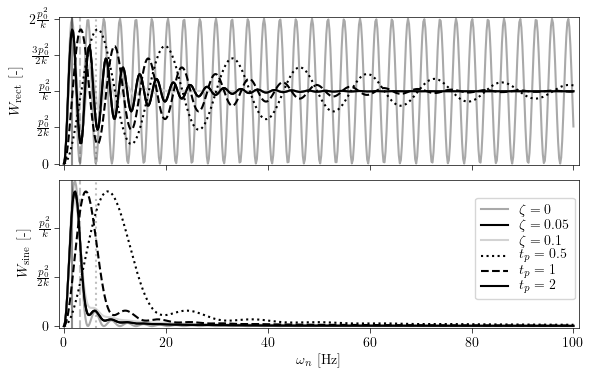

In [21]:
p0=2;k=1;
omegas=np.linspace(0,100,500)
form='rect'
with matplotlib.rc_context(rc=print_context_dict):
    fig,axes=plt.subplots(2,1,sharex=True)
    for form,ax in zip(['rect','sine'],axes):
        for zeta,tp,ls,c in [(0,2,'solid','darkgrey'),(0.05,2,'solid','black'), (0.1,2, 'solid','lightgrey'), (0.05,0.5,'dotted','black'),(0.05,1,'dashed','black'),(0.05,2,'solid','black')]:
            t_vals_int=np.array([0,tp])
            ws=[0]
            for omegan in omegas[1:]:
                if form=='sine':
                    A,B,C,D,E,F = analytical_constants_half_sine(p0, k, omegan, zeta, tp)
                    W = scipy.integrate.quad(work_integrand_half_sine, a=0, b=tp, args=(omegan, zeta, A, B, C, D, p0, tp))[0]*k/p0**2

                if form=='rect':
                    imp_resp_int = p0/k*(1-np.exp(-zeta*omegan*t_vals_int)*(np.cos(omegan*np.sqrt(1-zeta*2)*t_vals_int)+zeta/np.sqrt(1-zeta**2)*np.sin(omegan*np.sqrt(1-zeta**2)*t_vals_int)))
                    W=p0*(imp_resp_int[-1]-imp_resp_int[0])*k/p0**2
                ws.append(W)

            if zeta==0.05:
                ax.axvline(np.pi/tp, ls=ls, color=c, alpha=.25)

            ax.plot(omegas,ws, ls=ls,color=c)
        

        #ax.yaxis.set_major_locator(plt.MultipleLocator(1/5*np.sqrt(2)))
        ax.yaxis.set_major_formatter(major_formatterpk)
    axes[0].set_ylabel('$W_\\text{rect}$ [-]')
    axes[1].set_ylabel('$W_\\text{sine}$ [-]')
    axes[1].set_xlabel('$\\omega_n$ [\\si{\\hertz}]')
    plt.subplots_adjust(top=0.970, bottom=0.120, left=0.09, right=0.97, hspace=0.1)
    leg_handles=[]
    for zeta,tp,ls,c in [(0,2,'solid','darkgrey'),(0.05,2,'solid','black'), (0.1,2, 'solid','lightgrey')]:
    
        line = matplotlib.lines.Line2D([],[],color=c, ls=ls, label=f'$\\zeta = {zeta}$')
        leg_handles.append(line)
    for zeta,tp,ls,c in [(0.05,0.5,'dotted','black'),(0.05,1,'dashed','black'),(0.05,2,'solid','black')]:
        
        line = matplotlib.lines.Line2D([],[],color=c, ls=ls, label=f'$t_p = {tp}$')
        leg_handles.append(line)
    fig.legend(handles=leg_handles, loc=(.8,.21))
    #fig.savefig('/ismhome/staff/womo1998/Projects/2019_OMA_UQ/tex/figures/modeling_realization/impulse_response_work.pdf')
    #fig.savefig('/ismhome/staff/womo1998/Projects/2019_OMA_UQ/tex/figures/modeling_realization/impulse_response_work.png')
    plt.show()

/vegas/apps/compiler/intel/intelpython3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


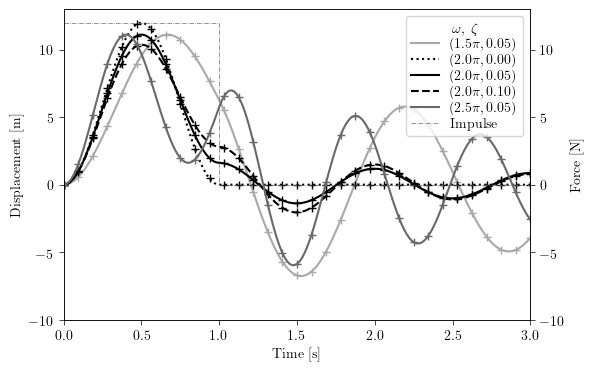

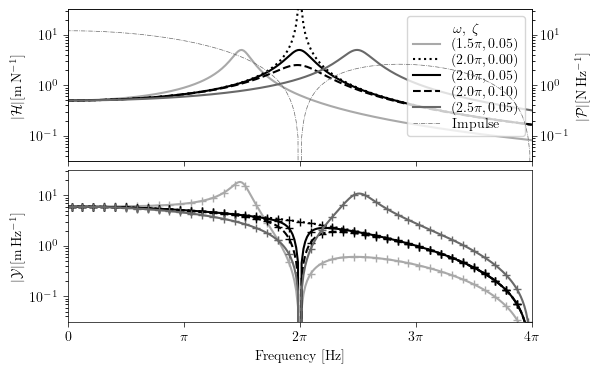

In [63]:
#%matplotlib notebook
%matplotlib inline

def frf(k,omega, omegan, zeta):
    return 1/k/(1+2*1j*zeta*omega/omegan-(omega/omegan)**2)

def rect_f(p0,tp,omega):
    if omega==0: return p0*tp
    #return -1j*p0/omega+1j*p0*np.exp(-1j*omega*tp)/omega
    return p0*tp*np.sin(omega*tp/2)/omega/tp*2*np.exp(-1j*omega*tp/2)

def integrand(omega,t, k, omegan, zeta, tp, p0):
    return frf(k,omega,omegan,zeta)*rect_f(p0,tp,omega)*np.exp(1j*omega*t)

def resp_t(ts, p0,k,zeta, omegan):
    return p0/k*(1-np.exp(-zeta*omegan*ts)*(np.cos(omegan*np.sqrt(1-zeta**2)*ts)+zeta/np.sqrt(1-zeta**2)*np.sin(omegan*np.sqrt(1-zeta**2)*ts)))
k=2
omegan=2*np.pi
zeta=0.05
tp=1
tpspread=32
p0=12

integ=False

flim=64 # sample rate (period frequency) in Hertz
dur=128 # period (time) in seconds
domega=2*np.pi/dur
dt=1/flim
N=flim*dur+1 # N=T/dt, dt=1/fs -> N=T*fs
omegas=np.linspace(-1/2*flim*2*np.pi,1/2*flim*2*np.pi,N) # bandwidth nu=1/2*fs in Hertz, =2*pi*nu in radians per second
ts=np.linspace(0,dur,N)

with matplotlib.rc_context(rc=print_context_dict): 
    fig1,ax=plt.subplots(1,1)
    fig,(ax1,ax2)=plt.subplots(2,1,sharey=True,sharex=True)

    #Time Domain exact (pulse, response)
    p=np.zeros_like(ts)
    p[ts<tp]=p0

    # Frequency domain exact (pulse, transfer function)
    P =[]
    for omega in omegas:
        P.append(rect_f(p0,tp,omega))
    P = np.array(P)
    ax1p=ax1.twinx()
    ax1p.plot(omegas,np.abs(P), color='dimgrey',ls='dashdot',lw=0.5, label='Impulse')
    # fftshift sort to normal oder
    Pfft=np.fft.fftshift(np.fft.fft(p))
    
    p[ts==tp]=p0/2
    ts_=np.concatenate((ts[ts<=tp],ts[ts>=tp]))
    p_=np.zeros_like(ts_)
    p_[:len(ts[ts<=tp])]=p0
    axp=ax.twinx()
    axp.plot(ts_, p_,  color='dimgrey',ls='dashdot',lw=0.5, label='Impulse')
    
    #for tp in [tp-tpspread/flim,tp,tp+tpspread/flim]:
    for color, ls, zeta,omegan in [('darkgrey','solid',zeta,omegan-np.pi/2),('black','dotted',0,omegan),('black','solid',zeta,omegan),('black','dashed',0.1,omegan),('dimgrey','solid',zeta,omegan+np.pi/2)]:
        #zeta=0

        resp=resp_t(ts,p0,k,zeta,omegan)
        resp[ts>tp]-=resp_t(ts-tp,p0,k,zeta,omegan)[ts>tp]


        # Frequency domain exact (pulse, transfer function)
        H=[]
        for omega in omegas:
            H.append(frf(k,omega,omegan, zeta))
        H = np.array(H)

        # Time domain Fourierseries (pulse, response)
        if integ:
            respint=[]
            pint=[]
            ts_int=np.linspace(0,dur,4*N)
            for t in ts_int:
                ifft_vals=[]
                for omega in omegas:
                    ifft_vals.append(np.exp((1j*omega)*t))
                ifft_vals=np.array(ifft_vals)
                this_resp=scipy.integrate.trapz(P*H*ifft_vals, omegas)/2/np.pi
                this_p=scipy.integrate.trapz(P*ifft_vals, omegas)/2/np.pi
                #this_y=scipy.integrate.quad(integrand, a=0, b=12*np.pi, args=(t, k, omegan, zeta, tp, p0))[0]
                respint.append(this_resp)
                pint.append(this_p)

        ax1.plot(omegas,np.abs(H), color=color,ls=ls, label=f'$({omegan/np.pi:.1f}\pi,{zeta:.2f})$')
        
        ax2.plot(omegas,np.abs(H*P), color=color,ls=ls, label=f'$({omegan/np.pi:.1f}\pi,{zeta:.2f})$')
        # fftshift sort to normal oder
        # *dt intergration factor 
        ax2.plot(omegas[::6],np.abs(np.fft.fftshift(np.fft.fft(resp)*dt))[::6], color=color, marker='+', ls='none')
        
        ax.plot(ts,resp,color=color,ls=ls, label=f'$({omegan/np.pi:.1f}\pi,{zeta:.2f})$')
        # ifftshift sort to numpy oder
        # *N undo numpy normalization, *domega integration factor , /2/pi apply normalization
        ax.plot(ts[::6],np.fft.ifft(np.fft.ifftshift(H*P))[::6]*N*domega/2/np.pi, color=color,marker='+', ls='none')
        if integ: ax.plot(ts_int,respint, label='int')

    ax2.set_yscale('log')    
    ax2.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter(4)))
    ax2.set_xlim((0,4*np.pi))
    ax2.set_xlabel('Frequency [\si{\hertz}]')
    ax2.set_ylabel('$|\mathcal{Y}| [\si{\meter\per\hertz}]$')
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1p.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2,title='$\omega,\; \zeta$', loc='upper right')
    ax1.set_yscale('log')
    ax1p.set_yscale('log')
    ax1p.set_ylim((10**(-1.5),10**1.5))
    ax1.set_ylim((10**(-1.5),10**1.5))
    ax1.set_xlim((0,4*np.pi)) 
    ax1.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter(4)))
    ax1.set_ylabel('$|\mathcal{H}| [\si{\meter\per\\newton}]$')
    ax1p.set_ylabel('$|\mathcal{P}| [\si{\\newton\per\\hertz}]$')
    
    ax.set_xlim((0,3*tp))
    ax.set_xlabel('Time [\si{\second}]')
    ax.set_ylabel('Displacement [\si{\meter}]')
    axp.set_ylabel('Force [\si{\\newton}]')
    ax.set_ylim((-10,13))
    axp.set_ylim((-10,13))
    
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = axp.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2,title='$\omega,\; \zeta$', loc='upper right')
    
    fig1.subplots_adjust(left=0.105, bottom=0.120, right=0.895, top=0.97)
    fig.subplots_adjust(left=0.11, bottom=0.115, right=0.895, top=0.97, hspace=0.06)
#     fig1.savefig('/ismhome/staff/womo1998/Projects/2019_OMA_UQ/tex/figures/modeling_realization/impulse_response.pdf')
#     fig1.savefig('/ismhome/staff/womo1998/Projects/2019_OMA_UQ/tex/figures/modeling_realization/impulse_response.png')
#     fig.savefig('/ismhome/staff/womo1998/Projects/2019_OMA_UQ/tex/figures/modeling_realization/frequency_response_rect.pdf')
#     fig.savefig('/ismhome/staff/womo1998/Projects/2019_OMA_UQ/tex/figures/modeling_realization/frequency_response_rect.png')
    
    
    plt.show()